# Example: Compare distributions for common particles in two models

In this example, we generate the pseudorapidity and Feynman-x distributions for selected particles in two models and compare them visually.

Requires extra packages: matplotlib, tqdm, boost-histogram, particle, joblib

In [1]:
import matplotlib.pyplot as plt
import boost_histogram as bh
from tqdm import tqdm
from particle import literals as lp, Particle
import joblib  # only joblib works reliably in notebooks

from impy.constants import TeV
from impy.kinematics import EventKinematics
import impy.models as im

In [2]:
# We want to simulate pp interactions at 1 TeV center-of-mass

# The event kinematics objects defines the collision and its frame.
# Here we want pp collisions at 1 TeV center-of-mass energy.
event_kinematics = EventKinematics(
    ecm= 1 * TeV,
    p1pdg=lp.proton.pdgid,
    p2pdg=lp.proton.pdgid
)

# How many events to generate
n_events = 10000

In [3]:
pid_axis = bh.axis.IntCategory([
    x.pdgid for x in (lp.pi_0, lp.pi_plus, lp.pi_minus, lp.K_plus, lp.K_minus, lp.proton, lp.antiproton)
])

models = [
    im.Sibyll21,
    im.Sibyll23d,
    im.QGSJet01c,
    im.QGSJetII04,
    im.Pythia6,
]

@joblib.delayed
def run(Model):    
    # Create mode instance here.
    # This typically generates a banner for each model.
    # Models can only be created once.

    m = Model(event_kinematics)
    m.set_stable(lp.pi_0.pdgid, True)

    # Histogram for Feynman-x distributions
    hx = bh.Histogram(pid_axis, bh.axis.Regular(30, -1, 1))

    # Histogram for pseudorapidity distributions
    heta = bh.Histogram(pid_axis, bh.axis.Regular(30, -7, 7))

    for event in tqdm(m(n_events), total=n_events):
        event.filter_final_state() # select only final state particles
        hx.fill(event.id, event.xf)
        heta.fill(event.id, event.eta)

    return m.label, hx, heta

with joblib.Parallel(n_jobs=10, batch_size=1) as pool:
    results = pool(run(m) for m in models)

results = {label: rest for (label, *rest) in results}


 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
 |                                                  |
 |                 S

  6%|▌         | 577/10000 [00:00<00:03, 2884.88it/s]

    1   1.000E+03    2.84   68.88   54.63   16.28   0.122   1.391   1.081
    1   1.259E+03    2.95   72.53   57.06   16.61   0.123   1.347   1.240
    1   1.585E+03    3.06   76.46   59.64   16.96   0.123   1.303   1.416
    1   1.995E+03    3.17   80.67   62.36   17.32   0.123   1.259   1.609
    1   2.512E+03    3.29   85.17   65.23   17.70   0.124   1.216   1.822
    1   3.162E+03    3.41   89.95   68.24   18.10   0.124   1.175   2.055
    1   3.981E+03    3.54   95.02   71.38   18.51   0.124   1.135   2.312
    1   5.012E+03    3.67  100.35   74.64   18.95   0.124   1.096   2.594
    1   6.310E+03    3.81  105.95   78.03   19.40   0.124   1.059   2.903
    1   7.943E+03    3.95  111.81   81.53   19.88   0.124   1.024   3.244
    1   1.000E+04    4.09  117.90   85.14   20.38   0.125   0.990   3.618
    1   1.259E+04    4.25  124.23   88.85   20.90   0.125   0.959   4.030
    1   1.585E+04    4.40  130.77   92.65   21.44   0.125   0.928   4.481
    1   1.995E+04    4.57  137.51   96

 11%|█▏        | 1130/10000 [00:00<00:03, 2456.53it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:330: RuntimeWarning: divide by zero encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)


    1   6.310E+04    5.47  173.92  117.27   25.17   0.125   0.690   6.243
    1   7.943E+04    5.67  181.69  121.64   25.87   0.125   0.649   6.417
    1   1.000E+05    5.88  189.60  126.07   26.58   0.125   0.611   6.601
    1   1.259E+05    6.10  197.66  130.57   27.31   0.125   0.576   6.799
    1   1.585E+05    6.32  205.84  135.12   28.06   0.125   0.543   7.013
    1   1.995E+05    6.55  214.16  139.74   28.82   0.125   0.512   7.247
    1   2.512E+05    6.78  222.60  144.41   29.60   0.125   0.484   7.501
    1   3.162E+05    7.03  231.15  149.14   30.39   0.125   0.457   7.763
    1   3.981E+05    7.28  239.82  153.93   31.21   0.125   0.432   7.999
    1   5.012E+05    7.54  248.60  158.77   32.03   0.125   0.408   8.168
    1   6.310E+05    7.81  257.49  163.65   32.87   0.125   0.385   8.278
    1   7.943E+05    8.08  266.48  168.59   33.72   0.125   0.364   8.364
    1   1.000E+06    8.37  275.56  173.57   34.59   0.125   0.343   8.442
    1   1.259E+06    8.67  284.75  178

  2%|▏         | 206/10000 [00:00<00:20, 480.44it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:330: RuntimeWarning: invalid value encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
 16%|█▋        | 1636/10000 [00:00<00:03, 2454.02it/s]

    1   6.310E+06   11.00  351.59  215.05   41.95   0.125   0.220   9.032
    1   7.943E+06   11.38  361.49  220.42   42.92   0.125   0.209   9.101
    1   1.000E+07   11.77  371.46  225.83   43.90   0.125   0.198   9.158

 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
    2   1.000E+01    1.45   23.12   19.94   10.12  -0.067   1.845   0.009
    2   1.259E+01    1.49   23.22   20.21   10.27  -0.031   1.827   0.016
    2   1.585E+01    1.54   23.49   20.57   10.42  -0.001   1.807   0.026
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
    2   1.995E+01    1.59   23.87   21.00   10.56   0.024   1.783   0.040
    2   2.512E+01    1.64   24.33   21.49   10.70   0.045   1.756   0.058
    2   3.162E+01    1.69   24.89   21.95   10.84   0.061   1.727   0.081
    2   3.981E+01    1.75   25.53   22.48  

  0%|          | 0/10000 [00:00<?, ?it/s] 2330.22it/s]

    2   2.512E+02    2.30   33.35   28.30   11.40   0.117   1.340   0.592
    2   3.162E+02    2.38   34.99   29.47   11.45   0.119   1.288   0.690
    2   3.981E+02    2.46   36.93   30.84   11.55   0.120   1.236   0.798
    2   5.012E+02    2.55   39.22   32.47   11.69   0.121   1.184   0.916
    2   6.310E+02    2.65   41.93   34.36   11.88   0.122   1.132   1.044
    2   7.943E+02    2.74   45.10   36.57   12.12   0.123   1.082   1.183
    2   1.000E+03    2.84   48.81   39.13   12.41   0.123   1.033   1.333
    2   1.259E+03    2.95   52.13   41.43   12.78   0.123   0.987   1.497
    2   1.585E+03    3.06   55.69   43.86   13.16   0.124   0.942   1.673
    2   1.995E+03    3.17   59.50   46.43   13.56   0.124   0.899   1.865
    2   2.512E+03    3.29   63.55   49.12   13.97   0.124   0.859   2.072
    2   3.162E+03    3.41   67.83   51.93   14.39   0.124   0.821   2.298
    2   3.981E+03    3.54   72.35   54.85   14.83   0.124   0.785   2.543
    2   5.012E+03    3.67   77.09   57

 26%|██▌       | 2610/10000 [00:01<00:03, 2202.77it/s]

    2   1.585E+04    4.40  103.94   74.44   17.79   0.125   0.614   4.543
    2   1.995E+04    4.57  109.87   78.01   18.34   0.125   0.591   4.953
    2   2.512E+04    4.74  115.96   81.65   18.91   0.125   0.565   5.303
    2   3.162E+04    4.91  122.21   85.36   19.50   0.125   0.535   5.552
    2   3.981E+04    5.09  128.62   89.15   20.10   0.125   0.504   5.737
    2   5.012E+04    5.28  135.18   92.99   20.72   0.125   0.474   5.904
    2   6.310E+04    5.47  141.88   96.91   21.35   0.125   0.446   6.067
    2   7.943E+04    5.67  148.71  100.88   22.00   0.125   0.419   6.233
    2   1.000E+05    5.88  155.68  104.91   22.66   0.125   0.394   6.404
    2   1.259E+05    6.10  162.78  109.01   23.34   0.125   0.371   6.584
    2   1.585E+05    6.32  170.01  113.15   24.03   0.125   0.349   6.776
    2   1.995E+05    6.55  177.35  117.36   24.73   0.125   0.329   6.981
    2   2.512E+05    6.78  184.81  121.61   25.45   0.125   0.311   7.200
    2   3.162E+05    7.03  192.39  125

 31%|███       | 3083/10000 [00:01<00:03, 2275.95it/s]

    2   1.259E+06    8.67  240.09  152.81   30.83   0.125   0.207   8.172
    2   1.585E+06    8.97  248.39  157.46   31.64   0.125   0.196   8.249
    2   1.995E+06    9.28  256.79  162.15   32.47   0.125   0.185   8.324
    2   2.512E+06    9.61  265.28  166.88   33.30   0.125   0.175   8.398
    2   3.162E+06    9.94  273.86  171.66   34.15   0.125   0.165   8.470
    2   3.981E+06   10.29  282.53  176.48   35.01   0.125   0.156   8.542
    2   5.012E+06   10.64  291.29  181.34   35.88   0.125   0.148   8.615
    2   6.310E+06   11.00  300.14  186.25   36.76   0.125   0.140   8.687
    2   7.943E+06   11.38  309.08  191.19   37.64   0.125   0.133   8.756
    2   1.000E+07   11.77  318.10  196.18   38.54   0.125   0.126   8.819

 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    3   1.000E+01    1.45   18.30   16.13    8.84  -0.025   1.845   0.009
    3   1.259E+01    1.49   18.83   1

 61%|██████    | 6101/10000 [00:03<00:01, 1977.90it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:330: RuntimeWarning: divide by zero encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
  0%|          | 0/10000 [00:00<?, ?it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:330: RuntimeWarning: invalid value encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
/Users/hdembinski/Extern/impy/src/impy/common.py:330: RuntimeWarning: divide by zero encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)


 done
  qgaini: nuclear cross sections readout from the file sectnu-II-04


100%|██████████| 10000/10000 [00:11<00:00, 897.85it/s]


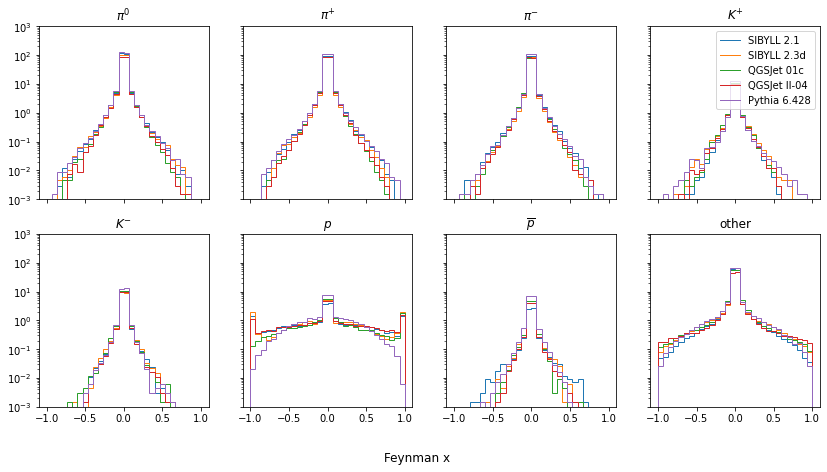

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

# boost-histogram axes contain overflow bins to count everything else,
# we use this here to show a histogram of all other particles
labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in pid_axis]
labels += ["other"]

for model, (hx, heta) in results.items():
    a = hx.axes[1]
    values = hx.values(True) # this returns the full histogram including overflow bins
    values = values[:, 1:-1] # strip the overflow bins from the second axis
    labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in hx.axes[0]]
    labels += ["other"]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e3)
fig.supxlabel("Feynman x")
ax[0, -1].legend();

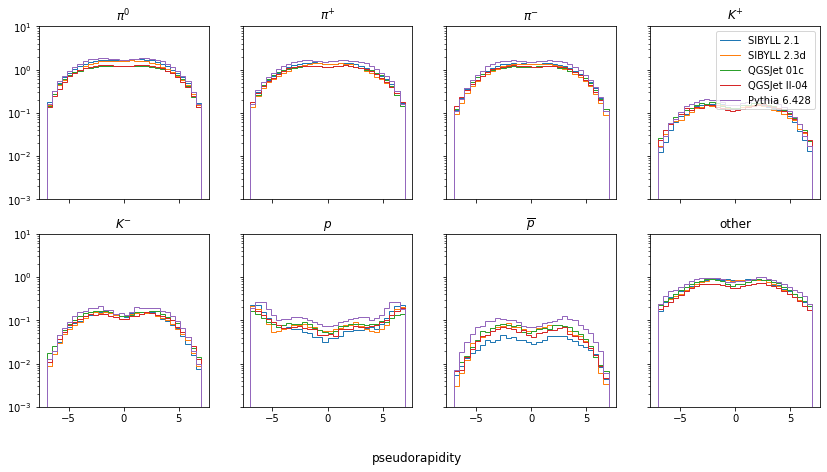

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

for model, (hx, heta) in results.items():
    a = heta.axes[1]
    values = heta.values(True)
    values = values[:, 1:-1]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e1)
fig.supxlabel("pseudorapidity")
ax[0, -1].legend();